DemoFusion

This pipeline is the official implementation of [DemoFusion: Democratising High-Resolution Image Generation With No $$$](https://arxiv.org/abs/2311.16973). This script was contributed by [RuoyiDu](https://github.com/RuoyiDu) and the notebook by[ParagEkbote](https://github.com/ParagEkbote).

Parameters:

view_batch_size (int, defaults to 16): The batch size for multiple denoising paths. Typically, a larger batch size can result in higher efficiency but comes with increased GPU memory requirements.

stride (int, defaults to 64): The stride of moving local patches. A smaller stride is better for alleviating seam issues, but it also introduces additional computational overhead and inference time.

cosine_scale_1 (float, defaults to 3): Control the strength of skip-residual. For specific impacts, please refer to Appendix C in the DemoFusion paper.

cosine_scale_2 (float, defaults to 1): Control the strength of dilated sampling. For specific impacts, please refer to Appendix C in the DemoFusion paper.

cosine_scale_3 (float, defaults to 1): Control the strength of the Gaussian filter. For specific impacts, please refer to Appendix C in the DemoFusion paper.

sigma (float, defaults to 1): The standard value of the Gaussian filter. Larger sigma promotes the global guidance of dilated sampling, but has the potential of over-smoothing.

multi_decoder (bool, defaults to True): Determine whether to use a tiled decoder. Generally, when the resolution exceeds 3072x3072, a tiled decoder becomes necessary.

show_image (bool, defaults to False): Determine whether to show intermediate results during generation.


In [1]:
pip install diffusers torch accelerate transformers

Note: you may need to restart the kernel to use updated packages.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Phase 1 Denoising ###


  0%|          | 0/50 [00:00<?, ?it/s]

### Phase 1 Decoding ###


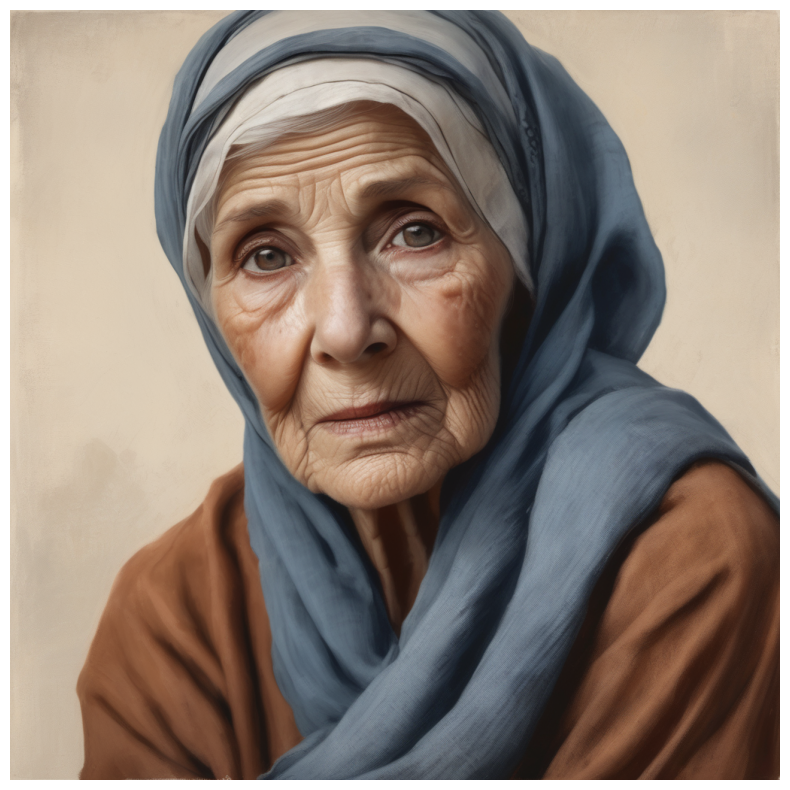

### Phase 2 Denoising ###


  0%|          | 0/50 [00:00<?, ?it/s]

### Phase 2 Decoding ###


  0%|          | 0/64 [00:00<?, ?it/s]

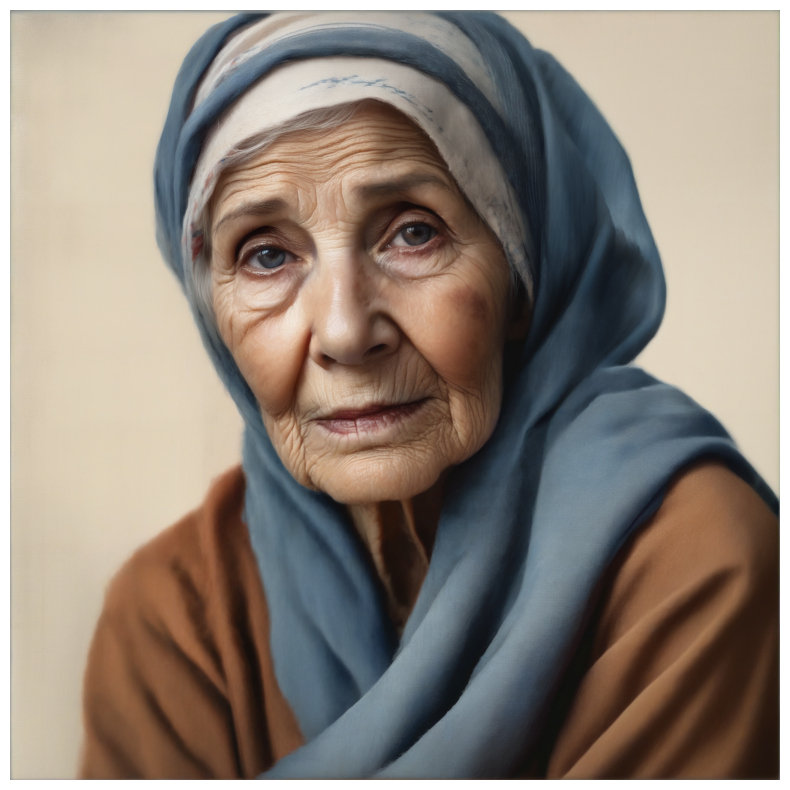

### Phase 3 Denoising ###


  0%|          | 0/50 [00:00<?, ?it/s]

### Phase 3 Decoding ###


  0%|          | 0/144 [00:00<?, ?it/s]

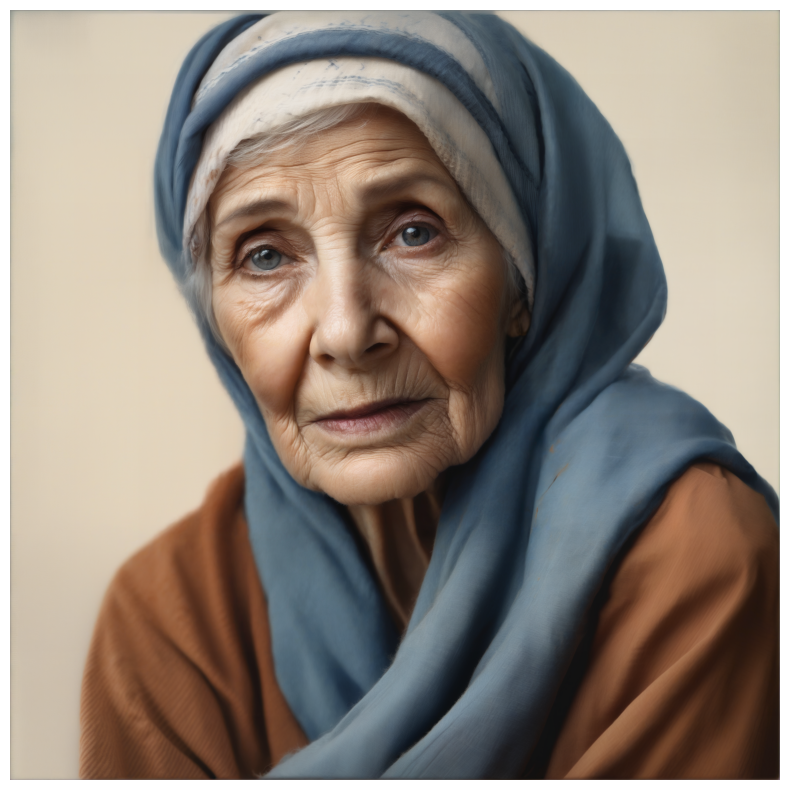

In [2]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    custom_pipeline="pipeline_demofusion_sdxl",
    custom_revision="main",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "Envision a portrait of an elderly woman, her face a canvas of time, framed by a headscarf with muted tones of rust and cream. Her eyes, blue like faded denim. Her attire, simple yet dignified."
negative_prompt = "blurry, ugly, duplicate, poorly drawn, deformed, mosaic"

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    height=3072,
    width=3072,
    view_batch_size=16,
    stride=64,
    num_inference_steps=50,
    guidance_scale=7.5,
    cosine_scale_1=3,
    cosine_scale_2=1,
    cosine_scale_3=1,
    sigma=0.8,
    multi_decoder=True,
    show_image=True
).images

for i, image in enumerate(images): 
    image_path = os.path.join(output_dir, f"generated_image_{i+1}.png") 
    image.save(image_path) print(f"Image saved to {image_path}")
    print(f"Image saved to {image_path}")

In [ ]:
from PIL import Image

def image_grid(imgs, save_path=None):

    w = 0
    for i, img in enumerate(imgs):
        h_, w_ = imgs[i].size
        w += w_
    h = h_
    grid =Image.new('RGB', size=(w, h))
    grid_w, grid_h = grid.size

    w = 0
    for i, img in enumerate(imgs):
        h_, w_ = imgs[i].size
        grid.paste(img, box=(w, h - h_))
        if save_path != None:
            img.save(save_path + "/img_{}.jpg".format((i + 1) * 1024))
        w += w_

    return grid

image_grid(images, save_path="./outputs/")